In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random

In [3]:
x = random.sample(range(0, 999999999), 1100)
y = []
for i in x:
    y.append(2*i + 12)

In [4]:
print(len(x), len(y))

1100 1100


In [5]:
for i in range(len(x)):
    print(x[i], y[i])

76860208 153720428
818733542 1637467096
526891636 1053783284
304003280 608006572
239414059 478828130
762848082 1525696176
860868268 1721736548
647033506 1294067024
765929698 1531859408
18159283 36318578
546000397 1092000806
585766702 1171533416
193205349 386410710
394641631 789283274
70638727 141277466
332511008 665022028
797048895 1594097802
662486130 1324972272
87622438 175244888
299757868 599515748
348567336 697134684
697582147 1395164306
164144962 328289936
279048543 558097098
148737787 297475586
866952900 1733905812
511244540 1022489092
351981954 703963920
803381013 1606762038
411235600 822471212
754004266 1508008544
768942932 1537885876
638811282 1277622576
371068653 742137318
219241048 438482108
583435706 1166871424
1865875 3731762
442049276 884098564
949178090 1898356192
784324654 1568649320
256606745 513213502
162232705 324465422
797793929 1595587870
769876628 1539753268
812302681 1624605374
429752100 859504212
351168745 702337502
820169674 1640339360
677075178 1354150368
1225

In [6]:
x = np.array(x)
y = np.array(y)

In [7]:
x

array([ 76860208, 818733542, 526891636, ...,   3945339, 185284582,
       527054473])

In [8]:
y

array([ 153720428, 1637467096, 1053783284, ...,    7890690,  370569176,
       1054108958])

In [9]:
u = x.mean()
std = x.std()

In [10]:
std

280992041.305824

In [11]:
x = (x - u)/std

In [12]:
u_y = y.mean()
std_y = y.std()
y = (y-u_y)/std_y

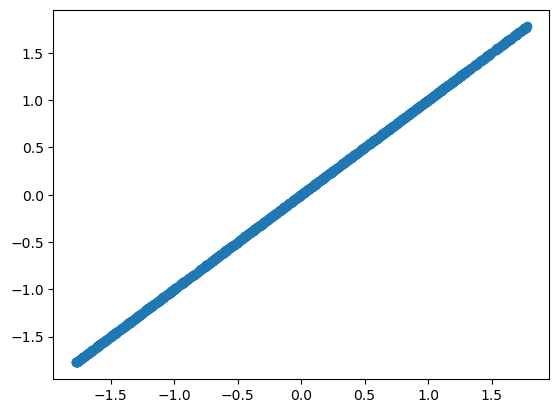

In [13]:
plt.scatter(x, y)

In [14]:
print(x.shape, y.shape, x[0], y[0])

(1100,) (1100,) -1.5060535349998303 -1.5060535349998303


In [15]:
def hypothesis(X, theta):
    y_ = theta[0] + theta[1]*X
    return y_

In [16]:
def cost(X, Y, theta):
    m = X.shape[0]
    
    total_loss = 0
    
    for i in range(m):
        y_p = hypothesis(X[i], theta)
        
        y_gt = Y[i]
        
        total_loss+=(y_p - y_gt)**2
        
    return total_loss/m

In [17]:
def gradient(X, Y, theta):
    m = X.shape[0]
    
    grad = np.zeros((2,))
    
    for i in range(m):
        y_p = hypothesis(X[i], theta)
        
        y_gt = Y[i]
        
        grad[0] += (y_p - y_gt)*1
        grad[1] += (y_p - y_gt)*X[i]
        
    return grad/m

In [18]:
def gradient_descent(X, Y, learning_rate = 0.001, epochs = 100):
    
    theta = np.zeros((2,))
    cost_epoch = []
        
    for i in range(epochs):
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta, cost_epoch

In [19]:
X_train = x[:1000]
Y_train = y[:1000]
X_test = x[1000:]
Y_test = y[1000:]

In [20]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1000,) (100,) (1000,) (100,)


In [21]:
theta, cost_epoch = gradient_descent(X_train, Y_train, learning_rate=0.03)

In [22]:
theta

array([-6.03285969e-04,  9.50604467e-01])

In [23]:
cost_epoch

[0.9877272543053174,
 0.9300572863479225,
 0.8757545226679345,
 0.8246223574378408,
 0.7764756645307697,
 0.7311401272160687,
 0.6884516069949119,
 0.6482555492904347,
 0.6104064238403928,
 0.5747671977659694,
 0.5412088394087097,
 0.5096098511389567,
 0.47985582944408867,
 0.45183905070362984,
 0.4254580811513236,
 0.40061740961186176,
 0.377227101682389,
 0.3552024741066121,
 0.33446378816241085,
 0.3149359609527313,
 0.2965482935543635,
 0.2792342150402291,
 0.2629310414483266,
 0.24757974882455383,
 0.23312475951762657,
 0.21951374095229104,
 0.2066974161521937,
 0.19462938532634388,
 0.1832659578731493,
 0.17256599419373353,
 0.1624907567417577,
 0.15300376977042218,
 0.1440706872688161,
 0.13565916860942143,
 0.12773876145652202,
 0.12028079151154575,
 0.11325825869612383,
 0.10664573939696766,
 0.10041929441861523,
 0.09455638231075242,
 0.08903577775629573,
 0.08383749472473129,
 0.07894271411246771,
 0.07433371560820504,
 0.0699938135366204,
 0.06590729644807707,
 0.0620593702

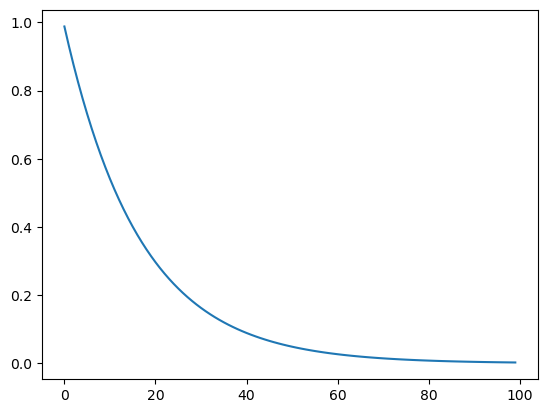

In [24]:
plt.plot(cost_epoch)

In [25]:
y_p = theta[0] + theta[1]*X_test

In [26]:
for i in range(len(y_p)):
    print(y_p[i], Y_test[i])

-0.9768655744505393 -1.026991059157352
0.48690815427514184 0.5128436243776228
-0.8794213641504153 -0.9244834298802269
0.25972108151473217 0.2738514035021907
-1.56849451566726 -1.649362362583928
1.3062629901846534 1.3747739690040068
-1.1175969137211783 -1.1750351133828045
-0.34667814440376077 -0.3640576816341819
1.0554296280156916 1.1109067446675598
-0.8549782798672599 -0.8987702283019079
-1.5034689231492786 -1.5809578949318344
0.3947610312403684 0.41590833086034174
-1.238551172051201 -1.3022744253357261
-0.7235392812565525 -0.760501365527556
1.2342476892189274 1.2990165920296477
1.271651874727522 1.338364382624067
0.6575660125282445 0.6923692464043931
-0.3500868480806502 -0.3676435091733447
0.5625623740999519 0.592429006568789
1.56826142670586 1.650386429912503
-1.1559086206718008 -1.2153375822618946
-0.929184762509358 -0.9768326456503289
-0.8400240023203152 -0.8830388930674378
0.61853466069905 0.6513097382902717
-0.6923288889088633 -0.7276692114312087
0.09973192255718835 0.10554885023

In [27]:
def R2_score(y_t, y_p):
    num = np.sum((y_t - y_p)**2)
    den = np.sum((y_t - y_t.mean())**2)
    
    score = (1 - num/den)
    
    return score

In [28]:
R2_score(Y_test, y_p)

0.9975540903073398